In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
import time
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('C2.csv')
col_num = 2
print(df)

         C2             C42
0       udp         normal.
1       udp         normal.
2       udp         normal.
3       udp  snmpgetattack.
4       udp  snmpgetattack.
...     ...             ...
311024  udp         normal.
311025  udp         normal.
311026  udp         normal.
311027  udp         normal.
311028  udp         normal.

[311029 rows x 2 columns]


In [3]:
print(df)

         C2             C42
0       udp         normal.
1       udp         normal.
2       udp         normal.
3       udp  snmpgetattack.
4       udp  snmpgetattack.
...     ...             ...
311024  udp         normal.
311025  udp         normal.
311026  udp         normal.
311027  udp         normal.
311028  udp         normal.

[311029 rows x 2 columns]


In [4]:
df.columns
feature_names = df.columns
feature_names = feature_names[:(col_num - 1)]
print(feature_names)

Index(['C2'], dtype='object')


<AxesSubplot:>

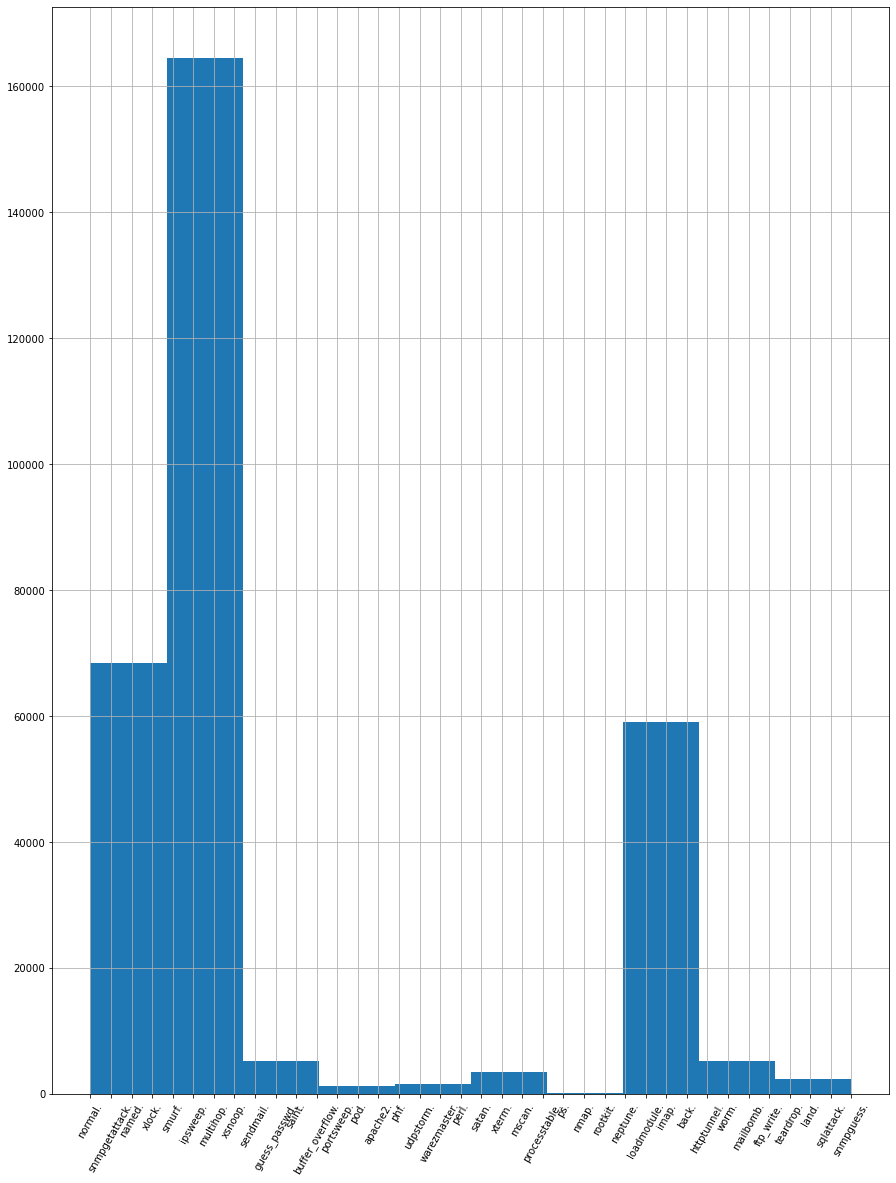

In [5]:
fig = plt.figure(figsize = (15,20))
plt.xticks(rotation = 60)
ax = fig.gca()
df['C42'].hist()

In [6]:
print(df['C42'].unique())

['normal.' 'snmpgetattack.' 'named.' 'xlock.' 'smurf.' 'ipsweep.'
 'multihop.' 'xsnoop.' 'sendmail.' 'guess_passwd.' 'saint.'
 'buffer_overflow.' 'portsweep.' 'pod.' 'apache2.' 'phf.' 'udpstorm.'
 'warezmaster.' 'perl.' 'satan.' 'xterm.' 'mscan.' 'processtable.' 'ps.'
 'nmap.' 'rootkit.' 'neptune.' 'loadmodule.' 'imap.' 'back.' 'httptunnel.'
 'worm.' 'mailbomb.' 'ftp_write.' 'teardrop.' 'land.' 'sqlattack.'
 'snmpguess.']


In [7]:
df=df[(df['C42']=='normal.') | (df['C42']=='smurf.') | (df['C42']=='snmpgetattack.') | (df['C42']=='udpstorm.') | (df['C42']=='neptune.')]
df.head()

,C2,C42
0,udp,normal.
1,udp,normal.
2,udp,normal.
3,udp,snmpgetattack.
4,udp,snmpgetattack.


<AxesSubplot:>

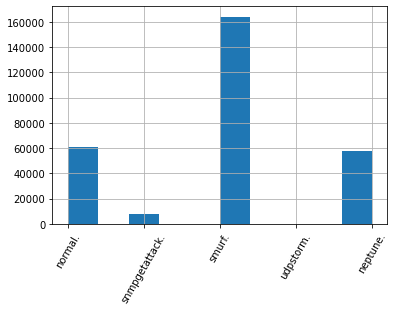

In [8]:
plt.xticks(rotation = 60)
df['C42'].hist()

In [9]:
data=df.values
data.shape

(290428, 2)

In [10]:
data[:,0]

array(['udp', 'udp', 'udp', ..., 'udp', 'udp', 'udp'], dtype=object)

In [11]:
le=[None]*col_num
for i in range(col_num):
    print(i,end=' | ')
    le[i] = LabelEncoder()
    le[i].fit(data[:,i])
    data[:,i]=le[i].transform(data[:,i])
    
print(data)

0 | 1 | [[2 1]
 [2 1]
 [2 1]
 ...
 [2 1]
 [2 1]
 [2 1]]


In [12]:
print(data)
print(len(data))
print(data[1,col_num-1])
for i in range(len(data)):
    if data[i,col_num-1] != 1:
        data[i,col_num-1] = 2

[[2 1]
 [2 1]
 [2 1]
 ...
 [2 1]
 [2 1]
 [2 1]]
290428
1


In [13]:
data=data.astype('int')
print(data[:,1])
print(data)

[1 1 1 ... 1 1 1]
[[2 1]
 [2 1]
 [2 1]
 ...
 [2 1]
 [2 1]
 [2 1]]


In [14]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(data[:,:(col_num - 1)], data[:,(col_num - 1)])
for train_index, test_index in sss.split(data[:,:(col_num - 1)], data[:,(col_num - 1)]):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data[:,:(col_num - 1)][train_index], data[:,:(col_num - 1)][test_index]
    y_train, y_test = data[:,(col_num - 1)][train_index], data[:,(col_num - 1)][test_index]

TRAIN: [256894  22974 117899 ...  69096  67069 210072] TEST: [267705 177253 101456 ... 137252 277914 221208]
TRAIN: [112011 176754 188454 ... 243625 133305  36663] TEST: [ 62055 163329  28662 ...  77895 164158 195327]
TRAIN: [256185 112346 103041 ... 240422 230846  98480] TEST: [180851 198984 136347 ...  32968  86240 255708]
TRAIN: [103700 177767 266482 ... 103094 115972 211257] TEST: [253884 100436  31250 ...  23461  23606 101220]
TRAIN: [271612    480 144504 ... 169836  92536  75369] TEST: [216089 259673  42568 ...  74664  93721 101349]


In [15]:
X_train,X_test,y_train,y_test=train_test_split(data[:,:(col_num - 1)],data[:,(col_num - 1)],test_size=0.2, random_state=42)

In [16]:
#training and testing the data
start = time.time()
DT=tree.DecisionTreeClassifier()
DT.fit(X_train,y_train)
train_time_Dtree = time.time() - start
DT_res=DT.predict(X_test)

In [17]:
print(DT_res)

[2 2 2 ... 2 2 2]


In [18]:
print(sum(DT_res==y_test)/len(y_test)*100)

82.16265537306752


In [19]:
confusion_matrix(DT_res, y_test)

array([[ 3237,  1542],
       [ 8819, 44488]], dtype=int64)

In [20]:
start = time.time()
clf = RandomForestClassifier(max_depth=100, random_state=10)
clf.fit(X_train, y_train)
train_time_RandomForest = time.time() - start

In [21]:
RF_res=clf.predict(X_test)

In [22]:
print(sum(RF_res==y_test)/len(y_test)*100)

82.16265537306752


In [23]:
confusion_matrix(RF_res, y_test)

array([[ 3237,  1542],
       [ 8819, 44488]], dtype=int64)

In [24]:
start = time.time()
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
train_time_QDA = time.time() - start

start_time = time.time()
result = permutation_importance(
    qda, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

QDA_res=qda.predict(X_test)

print(sum(QDA_res==y_test)/len(y_test)*100)

print(precision_score(QDA_res,y_test,average='micro'))

print(recall_score(QDA_res,y_test,average='micro'))

print(f1_score(QDA_res,y_test,average='micro'))

confusion_matrix(QDA_res, y_test)
print(confusion_matrix(QDA_res,y_test))

Elapsed time to compute the importances: 1.558 seconds
82.16265537306752
0.8216265537306752
0.8216265537306752
0.8216265537306752
[[ 3237  1542]
 [ 8819 44488]]


In [25]:
start = time.time()
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
train_time_SVM = time.time() - start

In [ ]:
SVM_res=clf.predict(X_test)
print(train_time_SVM)
print(sum(SVM_res==y_test)/len(y_test)*100)

In [ ]:
final_res = []
for i in range(len(QDA_res)):
    val = QDA_res[i] + RF_res[i] + DT_res[i]
    val = round(val/3 + 0.1)
    final_res.append(val)
    #print(val)
print(sum(final_res==y_test)/len(y_test)*100)
confusion_matrix(final_res, y_test)

In [ ]:
weird_final_res = []
for i in range(len(QDA_res)):
    if QDA_res[i] == RF_res[i] == DT_res[i]:
        val = QDA_res[i]
    elif QDA_res[i] == RF_res[i]:
        val = QDA_res[i]
    elif QDA_res[i] == DT_res[i]:
        val = QDA_res[i]
    elif RF_res[i] == DT_res[i]:
        val = DT_res[i]
    
    weird_final_res.append(val)
    #print(val)
print(sum(weird_final_res==y_test)/len(y_test)*100)
confusion_matrix(weird_final_res, y_test)

In [ ]:
four_final_res = []
for i in range(len(QDA_res)):
    val = QDA_res[i] + RF_res[i] + SVM_res[i]
    val = round(val/3)
    four_final_res.append(val)
    #print(val)
print(sum(four_final_res==y_test)/len(y_test)*100)
#confusion_matrix(four_final_res, y_test)

In [ ]:
gnb = GaussianNB()

NB_pred = gnb.fit(X_train, y_train).predict(X_test)

print(sum(NB_pred==y_test)/len(y_test)*100)
confusion_matrix(NB_pred, y_test)

four_final_res = []
for i in range(len(QDA_res)):
    val = QDA_res[i] + RF_res[i] + NB_pred[i] + SVM_res[i]
    val = round(val/4)
    four_final_res.append(val)
    #print(val)
print(sum(four_final_res==y_test)/len(y_test)*100)